In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajesh22ed
Your Kaggle Key: ··········


100%|██████████| 53.4M/53.4M [00:01<00:00, 48.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout,Input
from tensorflow.keras.optimizers import Adam

In [ ]:
raw_df = pd.read_csv('/content/jigsaw-toxic-comment-classification-challenge/train.csv')

In [ ]:
raw_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
target_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [ ]:
MAX_LENGTH  = 150

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_text, test_text, train_labels , text_labels = train_test_split(raw_df.comment_text,raw_df[target_cols],test_size=0.25,random_state=42)

In [ ]:
train_text

75144     ,  I have added the newline sign back in, you ...
154769    Don't worry, I think I fixed it. But still loo...
48346     "\nWell it seems to me that you have a problem...
72576     Contents\nThe contents box just appears when t...
79974     " \n\n(Btw., did you know the article links to...
                                ...                        
119879    REDIRECT Talk:John Loveday (experimental physi...
103694    Back it up. Post the line here with the refere...
131932    I won't stop that. Sometimes Germanic equals G...
146867    "\n\n British Bands?  \n\nI think you've mista...
121958    You are WRONG. \n\nJustin Thompson is mentione...
Name: comment_text, Length: 119678, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

In [ ]:
def preprocess_text(text_col):
  array = []
  for sentence in text_col.values:
    list_ = []
    for word in word_tokenize(sentence):
      if word.lower() not in stop_words:
        list_.append(stemmer.stem(word.lower()))
    array.append(' '.join(list_))
  return array

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(train_text)

In [ ]:
train = tokenizer.texts_to_sequences(train_text)

In [ ]:
test = tokenizer.texts_to_sequences(test_text)

In [ ]:
VOCAB_SIZE  = len(tokenizer.word_index)
VOCAB_SIZE

176207

In [ ]:
train_sequences = pad_sequences(train,maxlen =MAX_LENGTH,padding='post',truncating='post')

In [ ]:
test_sequences = pad_sequences(test,maxlen =MAX_LENGTH,padding='post',truncating='post')

In [ ]:
train_sequences.shape

(119678, 150)

In [ ]:
test_sequences.shape

(39893, 150)

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
def create_model():
  input_layer = Input(shape=(150,))
  embedding_layer = Embedding(VOCAB_SIZE+1,120,input_length=MAX_LENGTH)(input_layer)
  lstm_1 = LSTM(512,activation='relu',input_shape=(1,150),return_sequences=True)(embedding_layer)
  drop_out1 = Dropout(0.2)(lstm_1)
  lstm_2 = LSTM(256,activation='relu',return_sequences=True)(drop_out1)
  lstm_3 = LSTM(128,activation='relu')(lstm_2)
  out_put1 = Dense(6,activation='sigmoid',name='out_put1')(lstm_3)

  return tf.keras.models.Model(inputs=input_layer, outputs=[out_put1])

In [ ]:
model = create_model()

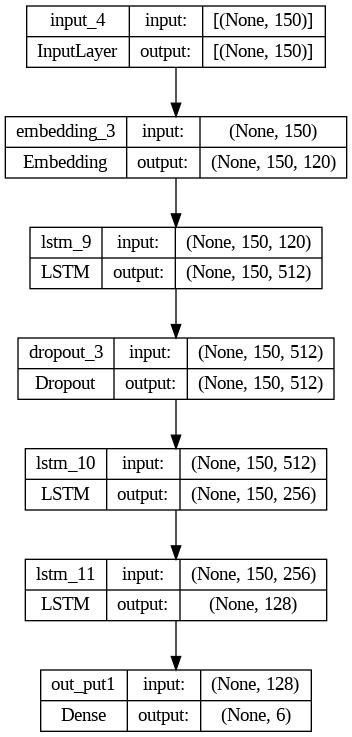

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              metrics = 'accuracy',
              loss = 'binary_crossentropy')

In [ ]:
def format_output(data):
    y1 = data.pop('toxic')
    y1 = np.array(y1)
    y2 = data.pop('severe_toxic')
    y2 = np.array(y2)
    y3 = data.pop('obscene')
    y3 = np.array(y3)
    y4 = data.pop('threat')
    y4 = np.array(y4)
    y5 = data.pop('insult')
    y5 = np.array(y5)
    y6 = data.pop('identity_hate')
    y6 = np.array(y6)
    return y1, y2,y3,y4,y5,y6

In [ ]:
train_label = format_output(train_labels)

In [ ]:
train_label

(array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
model.fit(train_sequences,train_labels,validation_split=0.2,epochs=3)

Epoch 1/3
1058/2992 [=========>....................] - ETA: 29:28 - loss: nan - accuracy: 0.9904

In [ ]:
train_sequences.shape

(119678, 150)